<a href="https://colab.research.google.com/github/hmk88/Learn_Data_Science/blob/master/Power_consumption(Time%20series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/Power_consumption.csv'
df1 = pd.read_csv(url)
df1.head()

,Power (MW)
0,9.2
1,9.4
2,9.6
3,9.8
4,10.0


In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/Tout.csv'
df2 = pd.read_csv(url)
df2.head()

,Air temp
0,-2.9
1,-3.2
2,-3.6
3,-4.0
4,-4.6


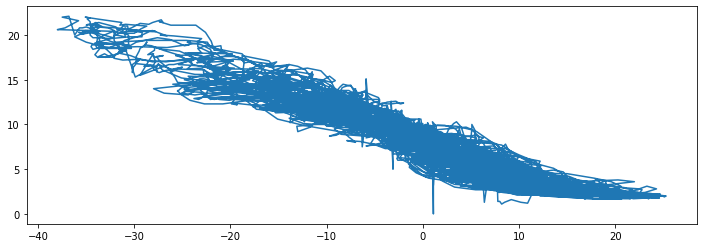

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df2, df1)
#plt.xlabel('Time (h)')
#plt.ylabel('Average surface temperature')
#plt.legend(['power', 'air temperature'])

Estimated coefficients:
b_0 = 8.204093760315581  nb_1 = -0.36231303062630243


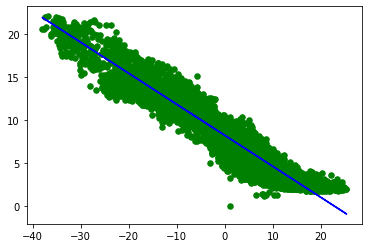

In [0]:
#Linear Regression just python 
import numpy as np
df2=np.array(df2) 
df1=np.array(df1)

n=np.size(df2)
mean_x=np.mean(df2)
mean_y=np.mean(df1)

#Cross deviation of data X and output Y to find the coefficient and the slope of the line 
SS_xy=np.sum(df1*df2)-n*mean_y*mean_x
SS_xx=np.sum(df2*df2)-n*mean_x*mean_x

#Slope of the line (power consumption)
b1=SS_xy/SS_xx

#Intercept of the line 
b0=mean_y-b1*mean_x

#Prediction of the line 
y_pred=b0+b1*df2

print("Estimated coefficients:\nb_0 = {}  nb_1 = {}".format(b0, b1)) 

#Data plot
plt.scatter(df2, df1, color = "g", marker="o", s=30)

#Prediction plot 
plt.plot(df2, y_pred, color= "b")


In [0]:
date= pd.date_range('2016-01-01', '2016-12-31', freq='1H')
date= pd.Series(date)
date.head()

0   2016-01-01 00:00:00
1   2016-01-01 01:00:00
2   2016-01-01 02:00:00
3   2016-01-01 03:00:00
4   2016-01-01 04:00:00
dtype: datetime64[ns]

In [0]:
df1.shape

(8784, 1)

In [0]:
date.shape

(8761,)

In [0]:
at=pd.Series(df1['Power (MW)'])

In [0]:
df = pd.DataFrame({"dates": date, "power": at})


In [0]:
df.dropna(inplace=True)

In [0]:
dfi=df.set_index('dates')

In [0]:
dfi.shape

(8761, 1)

In [0]:
nine=dfi.loc[dfi['power'] > 8]
nine.shape
#plt.plot(dfi.loc['2016-01' : '2016-12'] > 8 )

(4205, 1)

In [0]:
####Example dataset training and testing 
train=df[:7000]
test=df[7000:]

df.Timestamp = pd.to_datetime(df.dates,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [0]:
####Resampling the data with timestamp
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.dates,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.dates,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


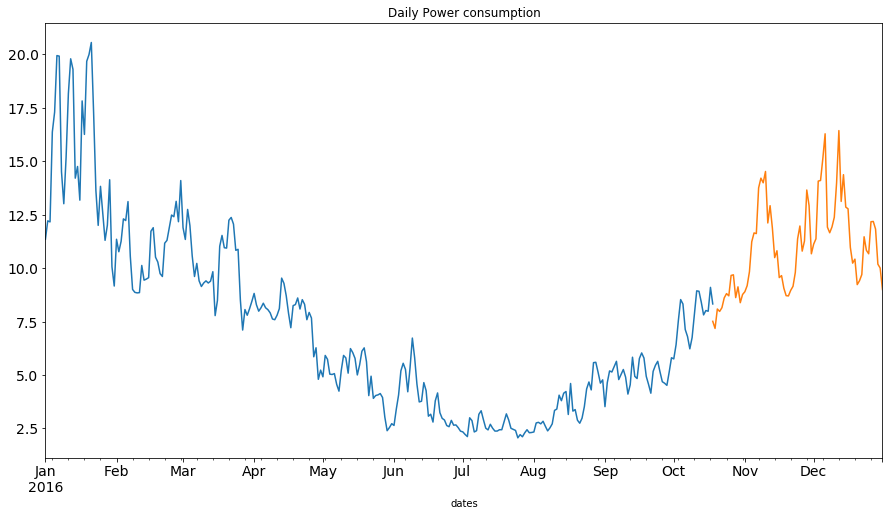

In [0]:
train.power.plot(figsize=(15,8), title= 'Daily Power consumption', fontsize=14)
test.power.plot(figsize=(15,8), title= 'Daily Power consumption', fontsize=14)
plt.show()

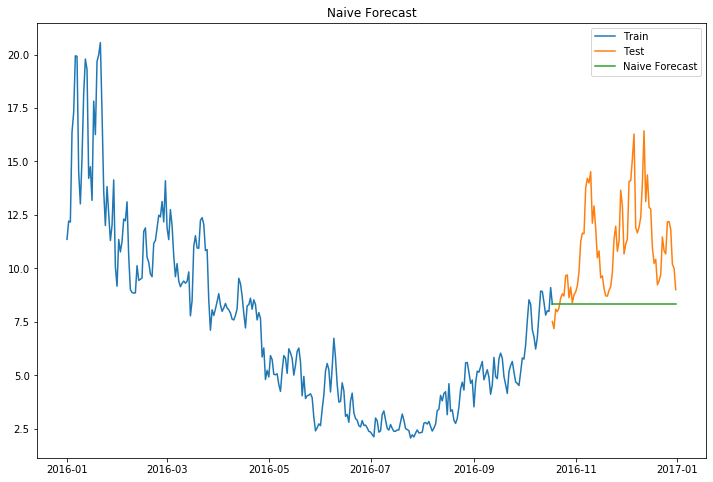

In [0]:
#####Naive model for future forecast
####  Y(t+1) = Y(t)
import numpy as np
daily= np.asarray(train.power)
y_hat = test.copy()
y_hat['naive'] = daily[len(daily)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['power'], label='Train')
plt.plot(test.index,test['power'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.power, y_hat.naive))
print(rms)

3.401056344616957


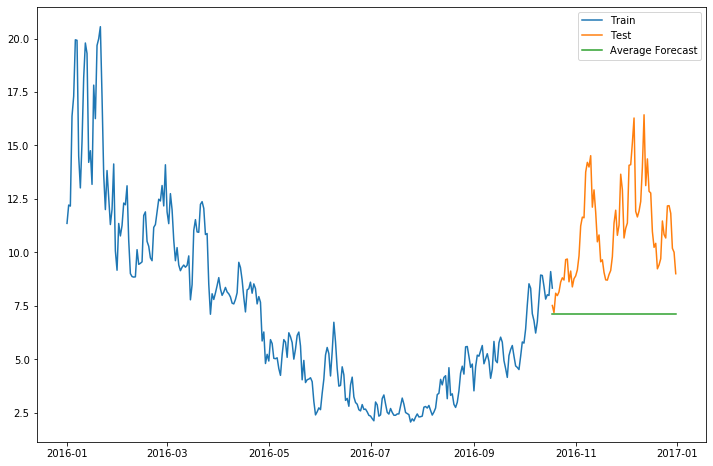

In [0]:
#Future forecast with Average 
# Y(t+1) = sum(Y(t))/t

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['power'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [0]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.avg_forecast))
print(rms)

4.409463331752809


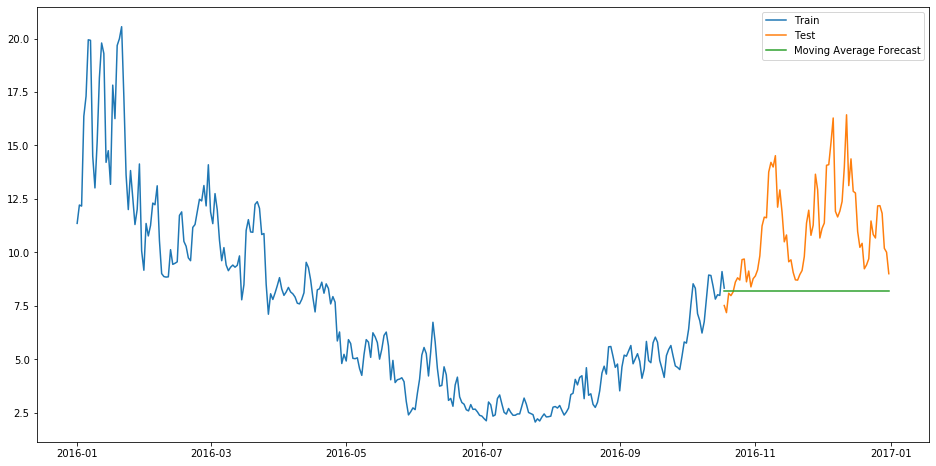

In [0]:
### Future forecast with Moving average 
# Y(t+1) = (Y(t-1) + Y(t-2) + . ....... Y(t-p))/p
## p->period of the previous data 
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['power'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [0]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.moving_avg_forecast))
print(rms)

5.710025471014094


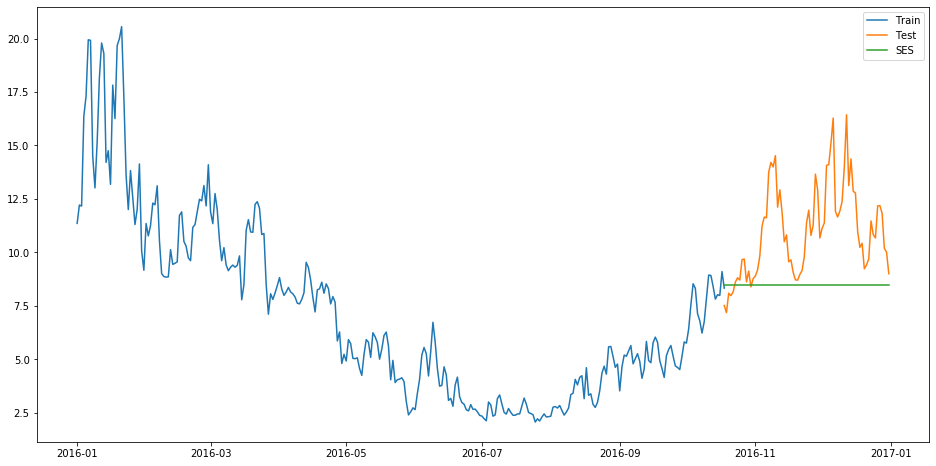

In [0]:
#Weighted moving average    Y(t+1) = (1/p)(WY(t)+W1Y(t-1)+W2Y(t-2)+ .....WpY(t-p))
######  Exponential smoothing     Y(t+1) = aY(t)+a(1-a)Y(t-1)+(a(1-a)^2)Y(t-2)+ .....
########Exponential smoothing can be approximated with only two past values with calculated weights
##########  =>  Y(t+1) = aY(t) + (1-a)Y(t-1)

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['power'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [0]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.SES))
print(rms)

3.295935267554558


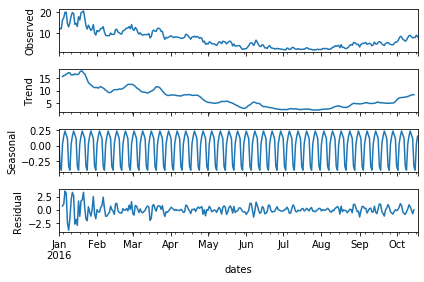

In [0]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.power).plot()
result = sm.tsa.stattools.adfuller(train.power)
plt.show()

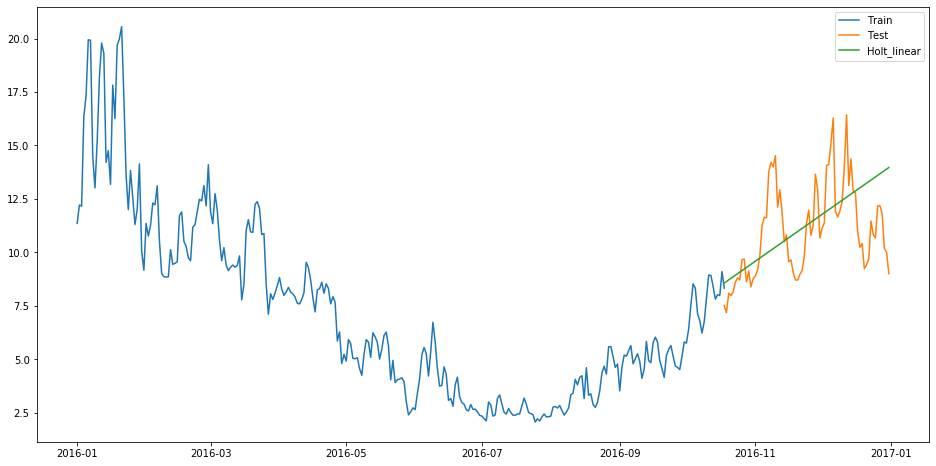

In [0]:
### An increasing trend can be forecast with Holt's linear trend
####### Holt is an exponential smoothing to trend and level of the dataset. 
################  Statsmodels api is referred for trend and level calculation
##############  Y(t+1) = L(t) + h B(t)    Forecast
###################   L(t) = aY(t) + (1-a)(L(t-1) + B(t-1))     Level 
##########################    B(t) = b*(L(t) - L(t-1)) + (1-b)*B(t-1)   Trend 

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['power'])).fit(smoothing_level = 0.7,smoothing_slope = 0.025)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [0]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.Holt_linear))
print(rms)

2.077903875234944


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


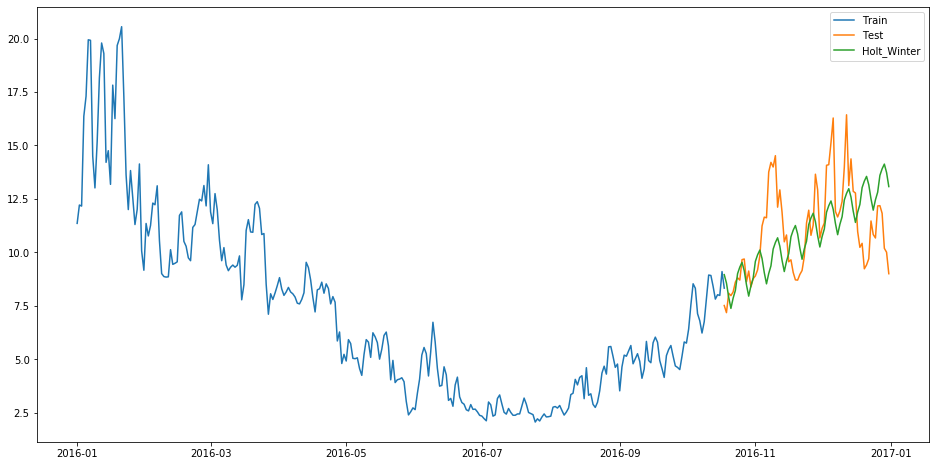

In [0]:
##### Holt-Winter method, it takes into account the seasonality of the dataset
#########   Y(t+k) = L(t) + kB(t) + S(t+k-s)      Forecast 
##################    L(t) = a(Y(t) - S(t-s)) + (1-a)(L(t-1) + B(t-1))    Level equation 
############################    B(t) = b(L(t) - L(t-1)) + (1-b)(B(t-1))   Trend equation 
########################################    S(t) = g(Y(t) - L(t)) + (1-g)(S(t-s))     Seasonality equation 
################################################     s is length of the seasonal cycle, a,b,g are between 0 and 1
y_hat_avg = test.copy()
######    Seasonal periods= 7 for weekly repetitive cycle
fit1 = ExponentialSmoothing(np.asarray(train['power']) ,seasonal_periods=8 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [0]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.Holt_Winter))
print(rms)

2.082427677930572


In [0]:
test.tail()

,power
dates,
2016-12-27,12.183333
2016-12-28,11.825000
2016-12-29,10.187500
2016-12-30,10.004167
2016-12-31,9.000000


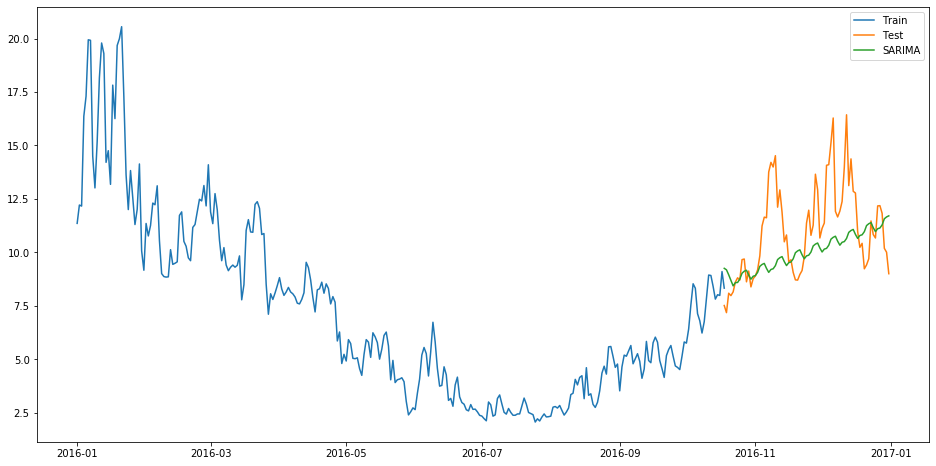

In [0]:
####    SARIMA model 

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.power, order=(2, 1, 4),seasonal_order=(0,1,1,8)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2016-10-18", end="2016-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [0]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.SARIMA))
print(rms)

2.1888331081046557


Text(0, 0.5, 'Average surface temperature')

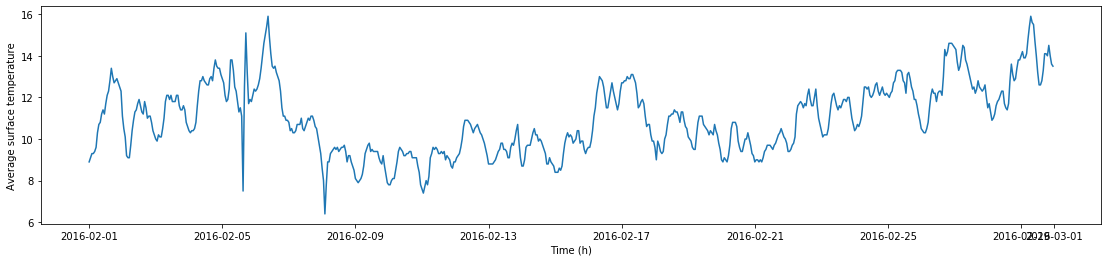

In [0]:
plt.figure(figsize=(19,4))
plt.plot(dfi['2016-02'])
plt.xlabel('Time (h)')
plt.ylabel('Average surface temperature')
#plt.legend(['power', 'air temperature'])

In [0]:
df['month'] = [d.strftime('%b') for d in df.dates]


In [0]:
df.head()

,dates,power,month
0,2016-01-01 00:00:00,9.2,Jan
1,2016-01-01 01:00:00,9.4,Jan
2,2016-01-01 02:00:00,9.6,Jan
3,2016-01-01 03:00:00,9.8,Jan
4,2016-01-01 04:00:00,10.0,Jan


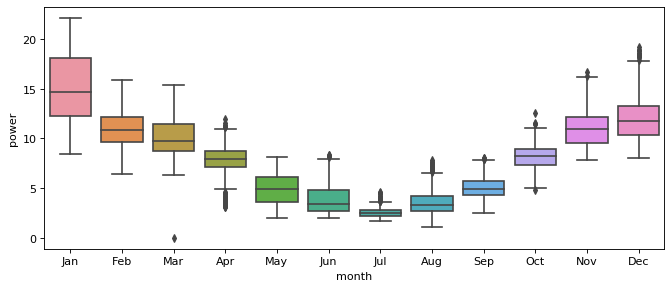

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(10,4), dpi= 80)
sns.boxplot(x='month', y='power', data=df)

plt.show()

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/Air%20temperature.csv'
df2 = pd.read_csv(url)
df2.head()

,Year,m,d,Time,Time zone,Air temperature (degC)
0,2016,1,1,00:00,UTC,-2.9
1,2016,1,1,01:00,UTC,-3.2
2,2016,1,1,02:00,UTC,-3.6
3,2016,1,1,03:00,UTC,-4.0
4,2016,1,1,04:00,UTC,-4.6


In [0]:
df['air temperature']=df2['Air temperature (degC)']

In [0]:
df['temp']=df['air temperature']

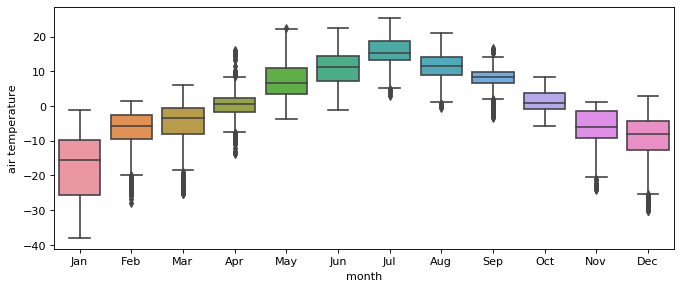

In [0]:
fig, axes = plt.subplots(1, 1, figsize=(10,4), dpi= 80)
sns.boxplot(x='month', y='air temperature', data=df)

plt.show()

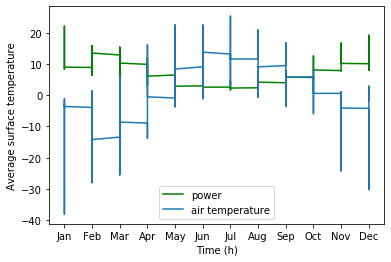

In [0]:
plt.plot(df.month, df.power, 'g', df.month, df.temp)
plt.xlabel('Time (h)')
plt.ylabel('Average surface temperature')
plt.legend(['power', 'air temperature'])